# Simple EDA on student performance

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving stud.csv to stud.csv


In [4]:

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "stud.csv" with length 73037 bytes


In [5]:
df=pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

<Axes: >

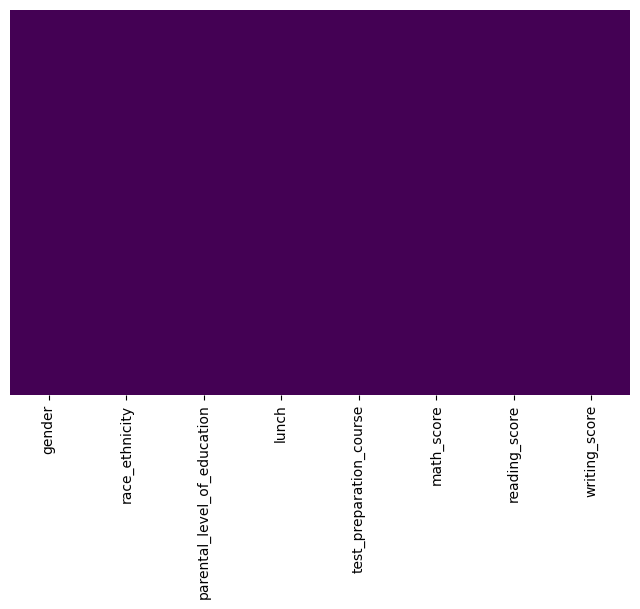

In [7]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
numerical_features=[i for i in df.columns if df[i].dtype!='O']
categorical_features=[i for i in df.columns if df[i].dtype=='O']

In [14]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [15]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [16]:
df['total_score']=(df['math_score']+df['reading_score']+df['writing_score'])
df['mean_score']=(df['total_score']/3)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


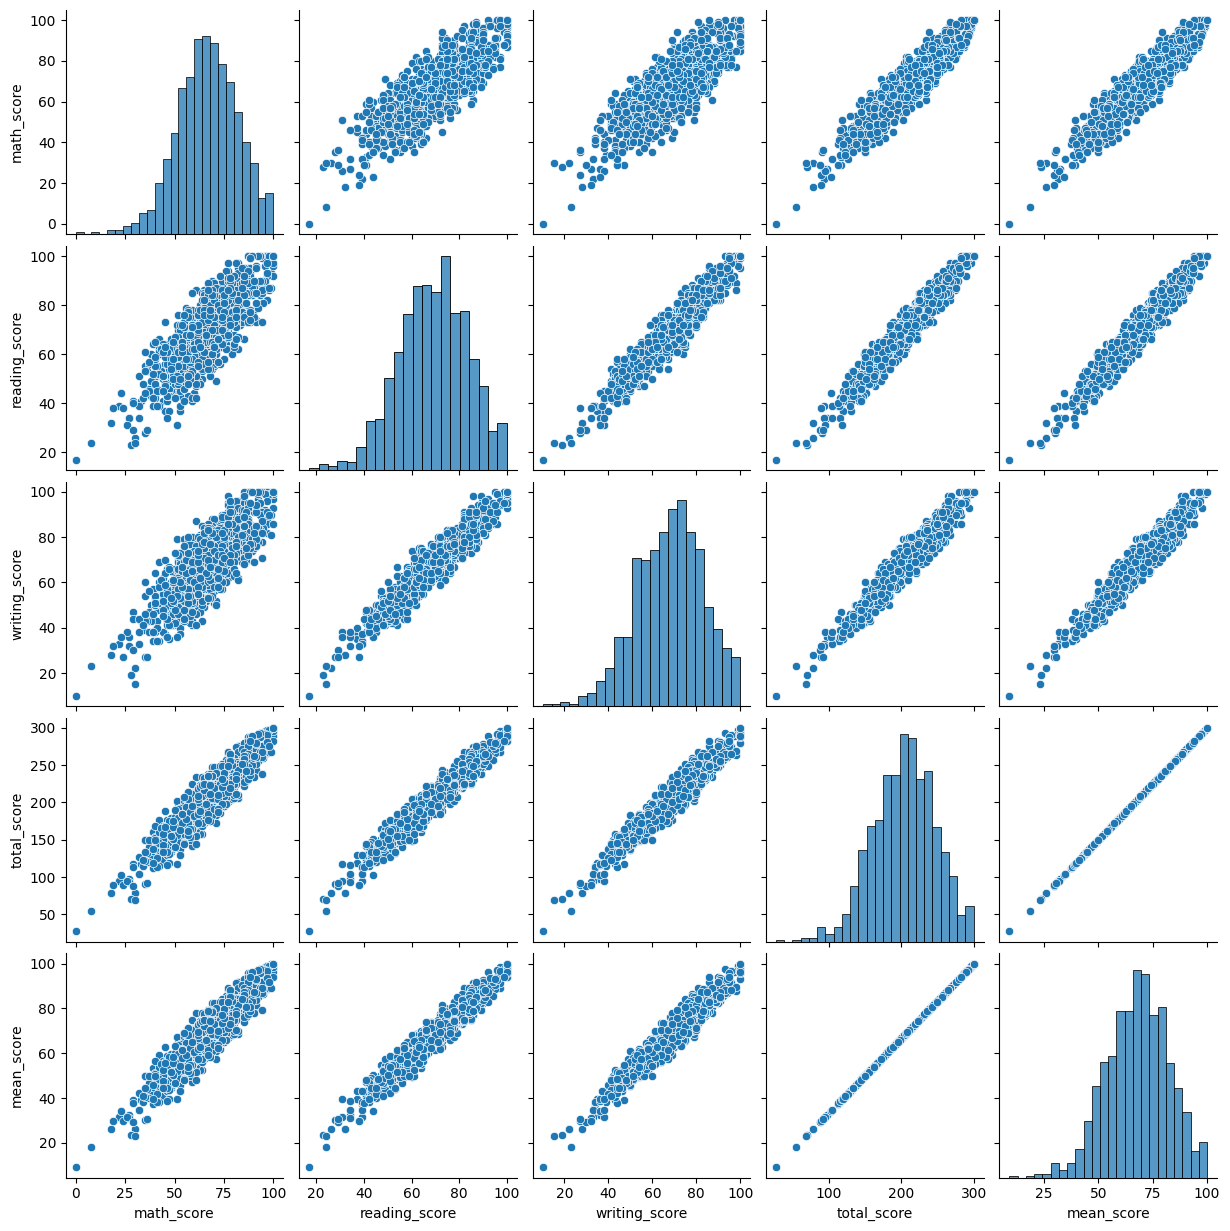

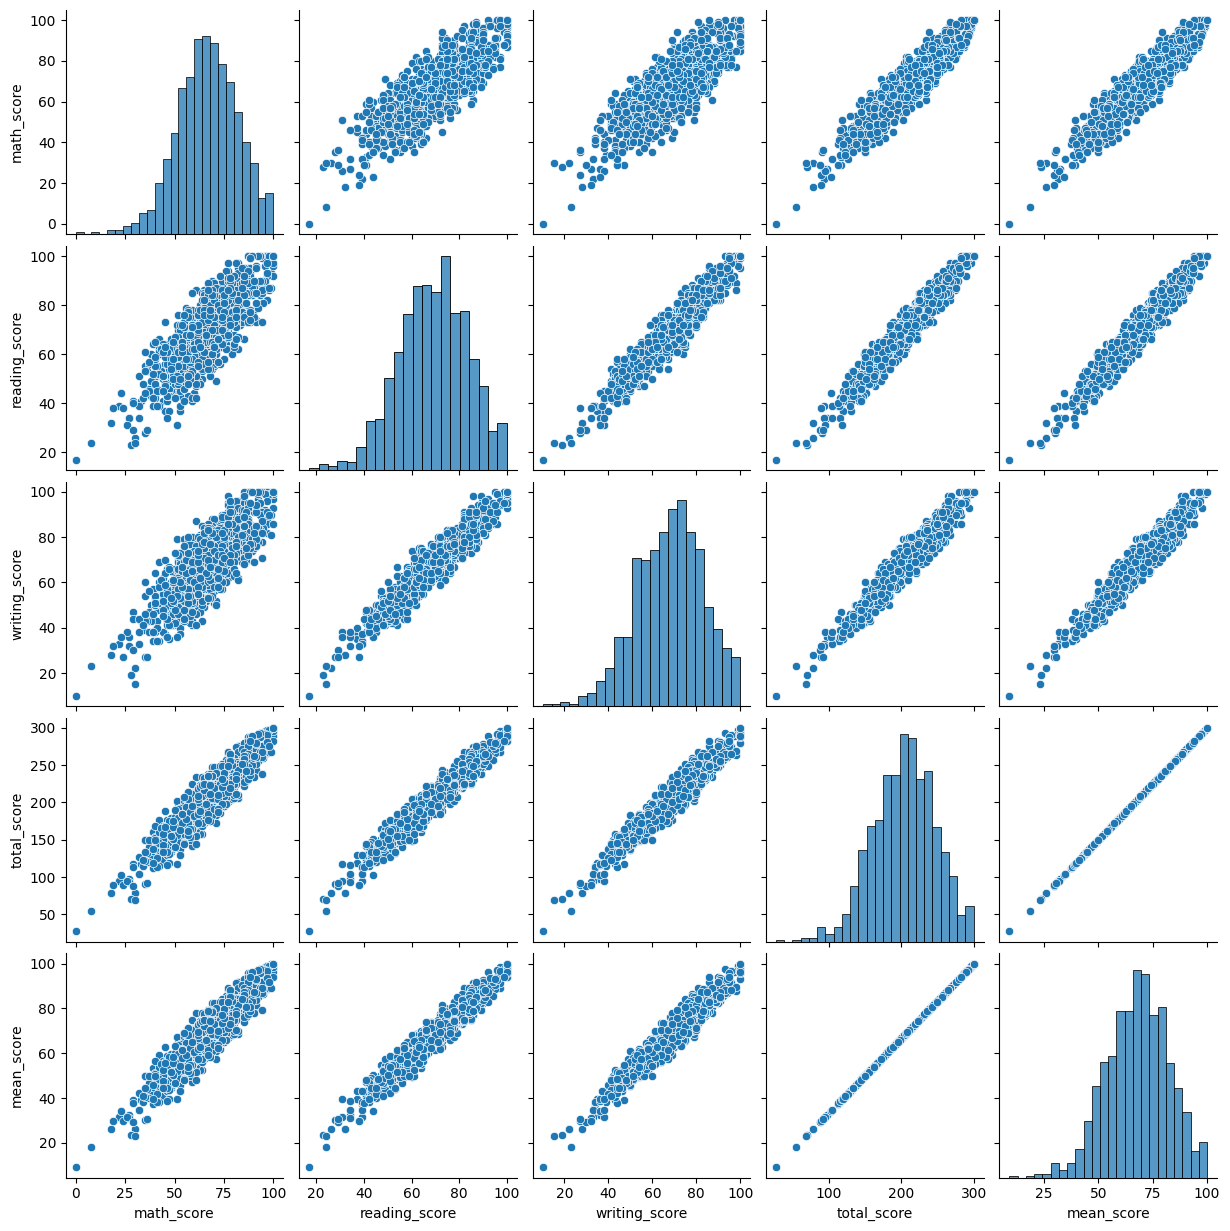

In [18]:
sns.pairplot(df)

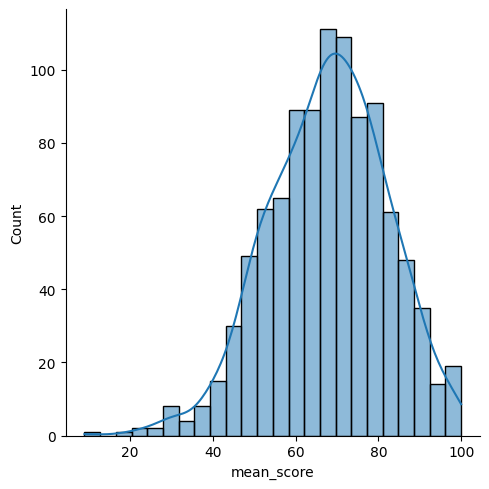

In [20]:
sns.displot(x='mean_score',kde=True,data=df)

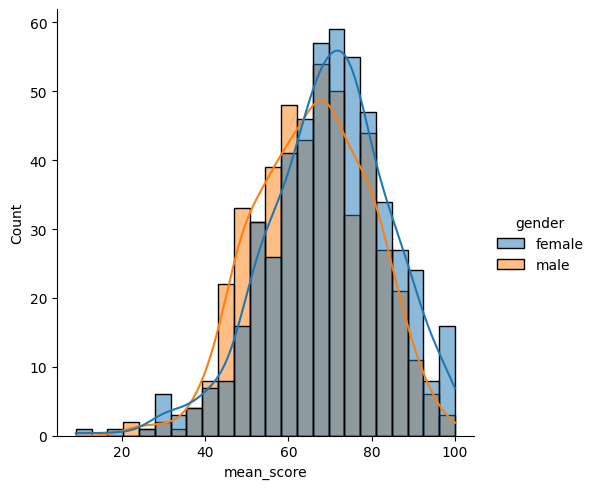

In [21]:
sns.displot(x='mean_score',kde=True,data=df,hue='gender')   #females have performed better

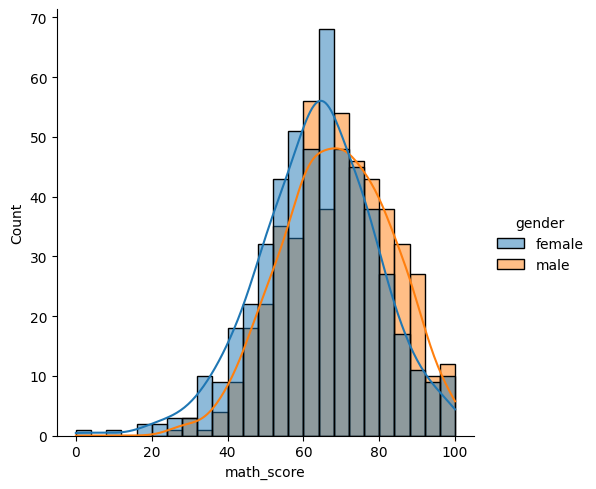

In [22]:
sns.displot(x='math_score',data=df,hue='gender',kde=True)

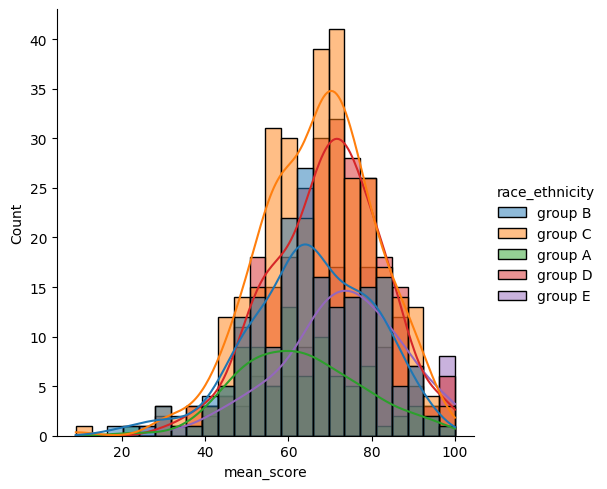

In [24]:
sns.displot(x='mean_score',data=df,hue='race_ethnicity',kde=True) #more number of students have acheived the mean score in group-c

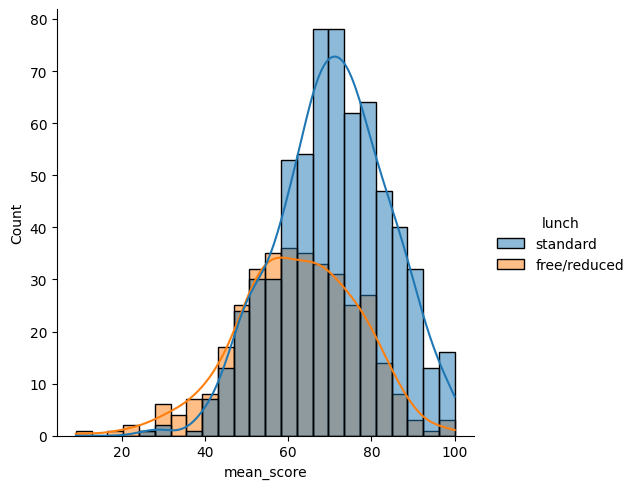

In [26]:
sns.displot(x='mean_score',data=df,hue='lunch',kde=True)        #standard lunch is good for our students

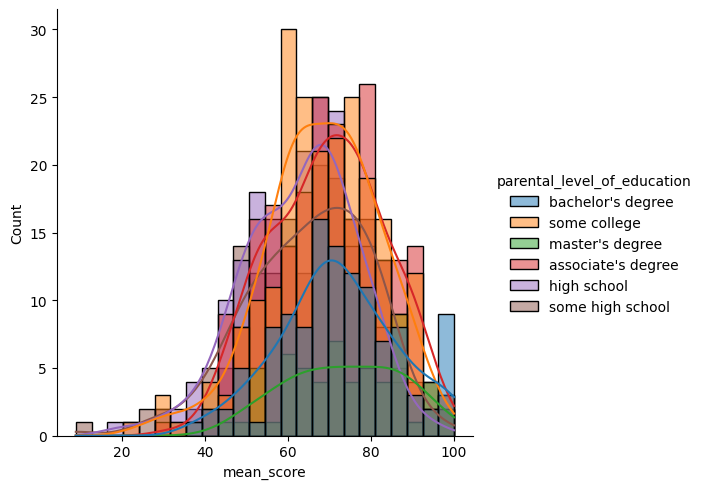

In [28]:

sns.displot(x='mean_score',data=df,hue='parental_level_of_education',kde=True) #not much imapactable